In [38]:
import pandas as pd

In [39]:
from sklearn.datasets import load_digits

In [40]:
data = load_digits()

In [41]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [42]:
X = pd.DataFrame( data['data'])
X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [43]:
Y = pd.Series( data['target'])
Y.tail()

1792    9
1793    0
1794    8
1795    9
1796    8
dtype: int32

In [44]:
Ydummy = pd.get_dummies( Y)
Ydummy.tail()

,0,1,2,3,4,5,6,7,8,9
1792,0,0,0,0,0,0,0,0,0,1
1793,1,0,0,0,0,0,0,0,0,0
1794,0,0,0,0,0,0,0,0,1,0
1795,0,0,0,0,0,0,0,0,0,1
1796,0,0,0,0,0,0,0,0,1,0


In [45]:
#from sklearn.model_selection import train_test_split

In [46]:
#X_test, X_train, Y_test, Y_train = train_test_split() 

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
# средние значения для каждого варианта max_depth
means = []

# стандартное отклонение для каждого варианта max_depth
stds = []

In [50]:
for depth in range(1,20):
    scores = cross_val_score( DecisionTreeClassifier( max_depth=depth), X, Ydummy, cv = 5, scoring='accuracy')
    print(depth, scores.mean())
    means.append(scores.mean())
    stds.append(scores.std())

1 0.0968229650263
2 0.138584029712
3 0.312180439492
4 0.424077684927
5 0.492584339214
6 0.662290312597
7 0.739057567317
8 0.765221293717
9 0.777466728567
10 0.773560817084
11 0.789133395234
12 0.781918910554
13 0.790795419375
14 0.781346332405
15 0.784690498298
16 0.789701330857
17 0.78190188796
18 0.784682760755
19 0.776341689879


In [51]:
max(means)

0.79079541937480657

In [55]:
means

[0.096822965026307647,
 0.13858402971216341,
 0.31218043949241719,
 0.42407768492726711,
 0.49258433921386569,
 0.66229031259671933,
 0.73905756731662031,
 0.76522129371711534,
 0.77746672856700694,
 0.77356081708449387,
 0.78913339523367376,
 0.78191891055400808,
 0.79079541937480657,
 0.7813463324048282,
 0.78469049829774062,
 0.78970133085731964,
 0.78190188796038373,
 0.78468276075518406,
 0.77634168987929431]

In [56]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

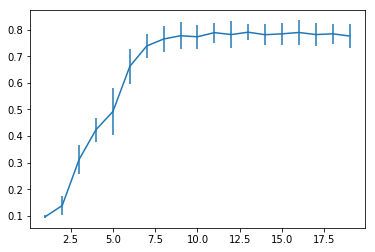

In [61]:
plt.errorbar(range(1,20),means,stds)

In [62]:
from sklearn.model_selection import GridSearchCV

In [65]:
params = [{'max_depth' : list( range(1, 20))}]

In [67]:
gs = GridSearchCV( DecisionTreeClassifier(), param_grid= params, scoring='accuracy')

In [68]:
gs.fit(X,Ydummy)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [69]:
gs.cv_results_

{'mean_fit_time': array([ 0.01084042,  0.01901642,  0.01874105,  0.02083619,  0.02906919,
         0.02807538,  0.03773316,  0.03568943,  0.03835837,  0.03935822,
         0.03969224,  0.04069265,  0.04051646,  0.04075201,  0.03866633,
         0.04988623,  0.03225319,  0.0478557 ,  0.04486314]),
 'mean_score_time': array([ 0.00333603,  0.00233595,  0.00183519,  0.00575058,  0.        ,
         0.        ,  0.00266925,  0.0025026 ,  0.00250268,  0.00266997,
         0.00250276,  0.00250252,  0.00083383,  0.00520945,  0.00520897,
         0.00083391,  0.0052096 ,  0.00183479,  0.00250173]),
 'mean_test_score': array([ 0.06176962,  0.16026711,  0.27991096,  0.44296049,  0.55759599,
         0.68781302,  0.73066221,  0.75459098,  0.76516416,  0.78964942,
         0.77239844,  0.79076238,  0.78575403,  0.7902059 ,  0.7968837 ,
         0.78519755,  0.7902059 ,  0.78074569,  0.78408459]),
 'mean_train_score': array([ 0.06594324,  0.17612688,  0.29910963,  0.49443517,  0.63216472,
         

In [70]:
gs.best_params_

{'max_depth': 15}

In [ ]:
import sklearn.